In [1]:
import math

import magnum as mn
import numpy as np
from matplotlib import pyplot as plt

import habitat_sim
from habitat_sim.gfx import LightInfo, LightPositionModel
from examples.settings import make_cfg, default_sim_settings
from habitat_sim.utils.common import quat_from_angle_axis, quat_to_magnum

In [2]:
def showObs(sim):
    showImg(sim.get_sensor_observations()["color_sensor"])

def showImg(data):
    plt.figure(figsize=(12, 12))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [3]:
def removeAllObjects(sim):
    for id in sim.get_existing_object_ids():
        sim.remove_object(id)

In [4]:
sim_settings = default_sim_settings.copy()
sim_settings["scene"] = "data/scene_datasets/habitat-test-scenes/apartment_1/apartment_1.glb"
sim_settings["enable_physics"] = True
sim_settings["width"] = 1080
sim_settings["height"] = 960
sim_cfg = make_cfg(sim_settings)
sim = habitat_sim.Simulator(sim_cfg)

W0220 18:10:46.146701 40068 simulator.py:146] Could not find navmesh data/scene_datasets/habitat-test-scenes/apartment_1/apartment_1.navmesh, no collision checking will be done


sim_cfg.physics_config_file = ./data/default.phys_scene_config.json
==== Initialized Sensor Spec: =====
Sensor uuid:  color_sensor
Sensor type:  SensorType.COLOR
Sensor position:  [0.  1.5 0. ]


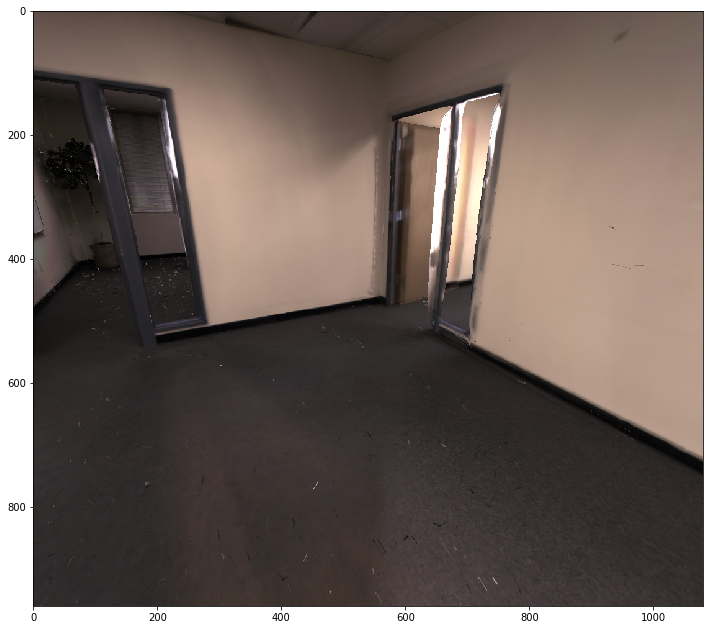

In [5]:
x_axis = np.array([1, 0, 0])
z_axis = np.array([0, 0, 1])
y_axis = np.array([0, 1, 0])

agent_state = habitat_sim.AgentState()
agent_state.position = [0.430924,-1.60025,6.15638]
agent_state.rotation = quat_from_angle_axis(math.radians(-30), y_axis) * quat_from_angle_axis(math.radians(-20), x_axis)
agent = sim.initialize_agent(0, agent_state)
agent_transform = agent.scene_node.transformation_matrix()
showObs(sim)

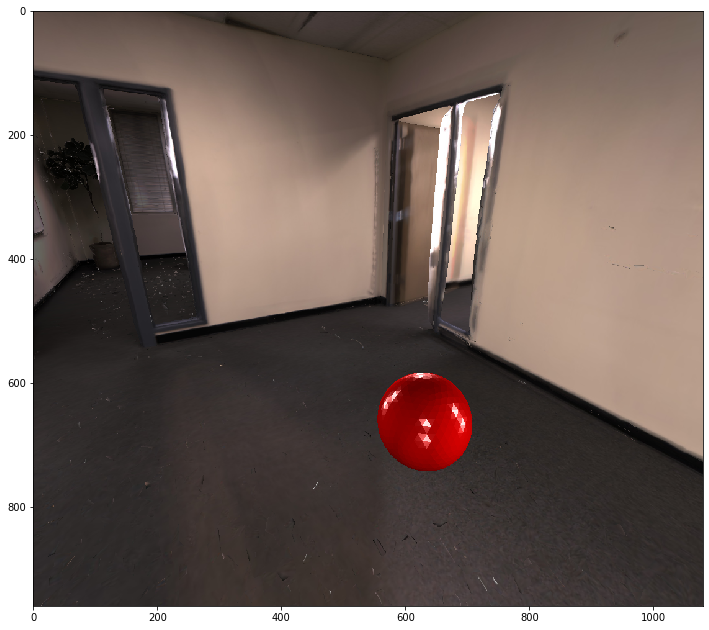

In [6]:
# by default, added objects will be phong shaded with lights at the corners of the scene
id_1 = sim.add_object(1)
sim.set_translation(agent_transform.transform_point([0.3, 0.9, -1.8]), id_1)

showObs(sim)

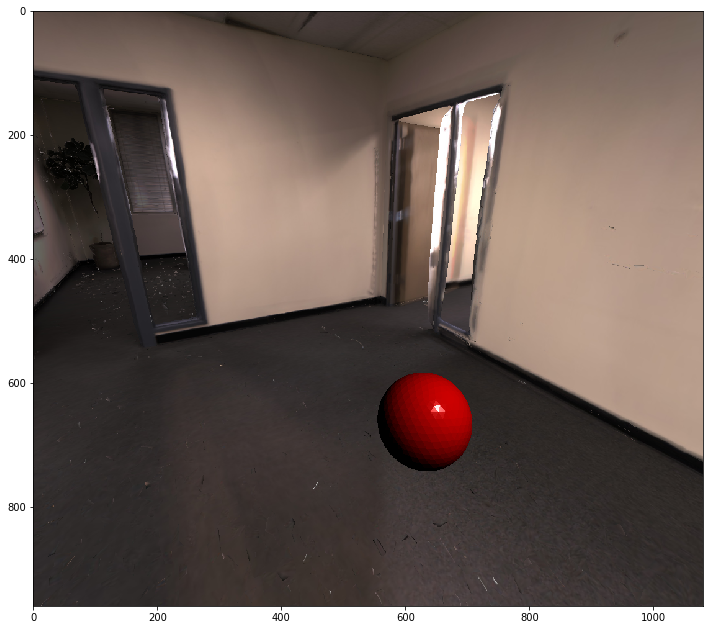

In [7]:
# we can update the default lighting
my_default_lighting = [LightInfo(position=[2.0, 2.0, 1.0], model=LightPositionModel.CAMERA)]

sim.set_light_setup(my_default_lighting)

showObs(sim)

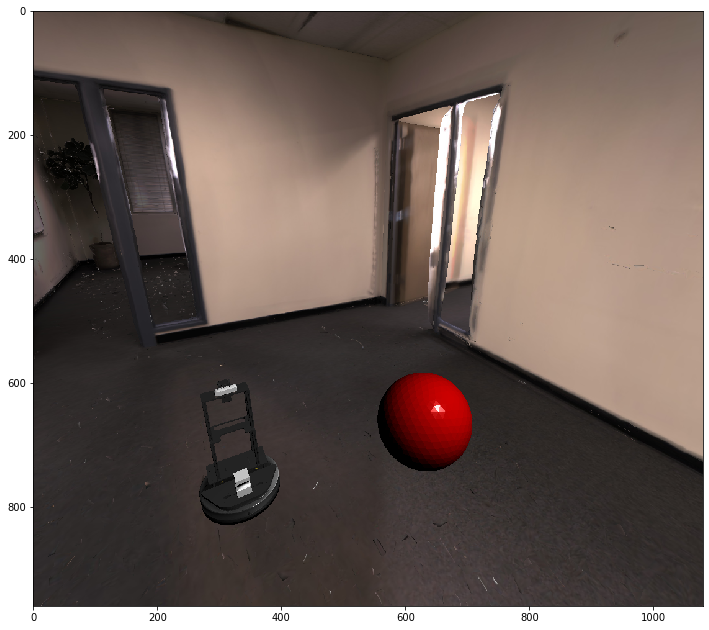

In [8]:
# newly added objects will use the current default lighting
id_2 = sim.add_object(3)
sim.set_rotation(mn.Quaternion.rotation(mn.Rad(mn.Deg(180)), mn.Vector3.y_axis()), id_2)
sim.set_translation(agent_transform.transform_point([-0.6, 0.9, -1.5]), id_2)

showObs(sim)

removeAllObjects(sim)

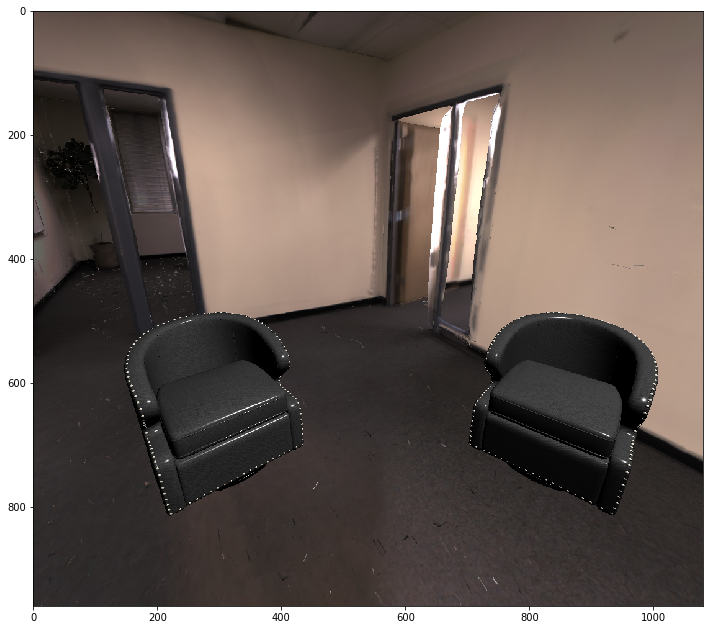

In [9]:
# custom lighting configurations can be created
light_setup_2 = [LightInfo(position=[2.0, 1.5, 6.0], model=LightPositionModel.GLOBAL)]
sim.set_light_setup(light_setup_2, "my_custom_lighting")

# to use your custom lighting, simply pass in the lighting as an optional parameter to add_object
id_1 = sim.add_object(2, "my_custom_lighting")
sim.set_rotation(mn.Quaternion.rotation(mn.Rad(mn.Deg(90)), mn.Vector3.x_axis()) *
                 mn.Quaternion.rotation(mn.Rad(mn.Deg(-10)), mn.Vector3.z_axis()), id_1)
sim.set_translation(agent_transform.transform_point([-0.8, 1.05, -1.75]), id_1)


id_2 = sim.add_object(2, "my_custom_lighting")
sim.set_rotation(mn.Quaternion.rotation(mn.Rad(mn.Deg(90)), mn.Vector3.x_axis()) *
                 mn.Quaternion.rotation(mn.Rad(mn.Deg(70)), mn.Vector3.z_axis()), id_2)
sim.set_translation(agent_transform.transform_point([1.0, 1.05, -1.75]), id_2)


showObs(sim)

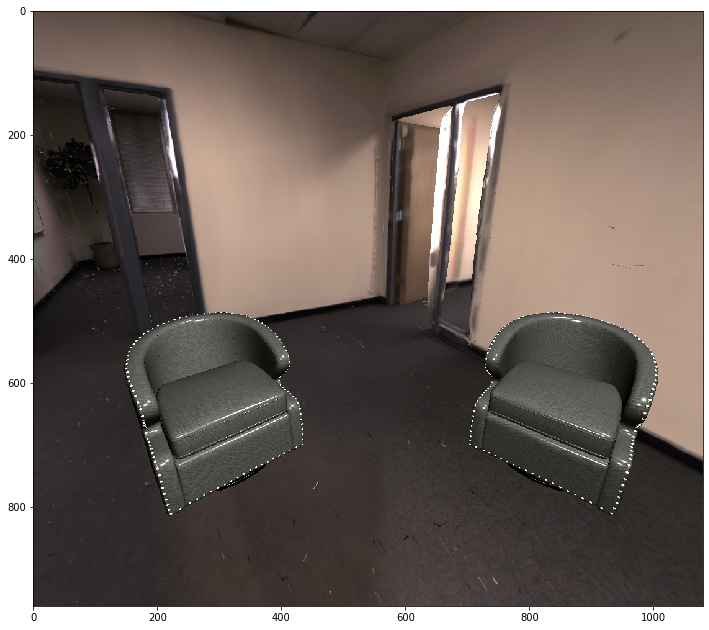

In [10]:
# we can get existing light setups
existing_light_setup = sim.get_light_setup("my_custom_lighting")
new_light_setup = existing_light_setup + [LightInfo(position=[0.0, 0.0, 0.0], color=[0.8, 0.8, 0.7], model=LightPositionModel.CAMERA)]

# updates to existing light setups will update all objects using that setup
sim.set_light_setup(new_light_setup, "my_custom_lighting")

showObs(sim)

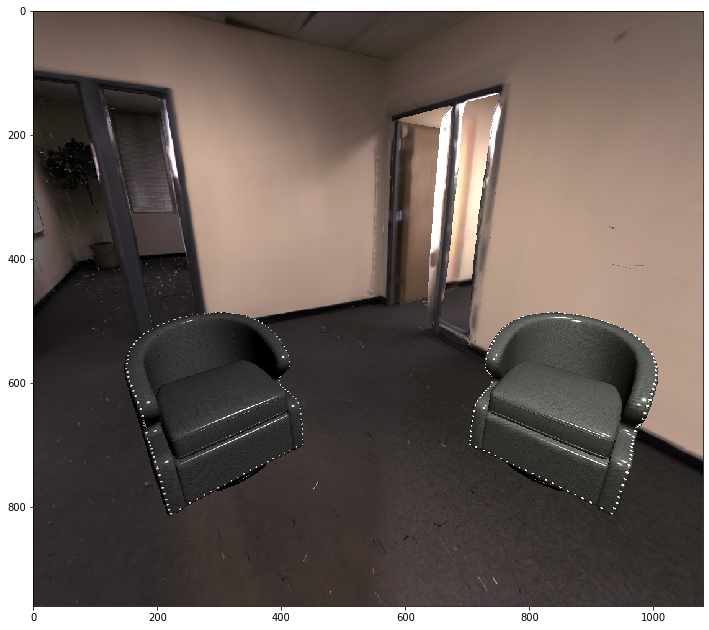

In [11]:
# make an individual object use another light setup
sim.set_object_light_setup(id_1, habitat_sim.gfx.DEFAULT_LIGHTING_KEY)


showObs(sim)